## Simple demonstration of calculating segmentation metrics

*NOTE(arl)*: the metrics here are calculated as follows in batch mode:
+ `n_true_labels` is the sum of all true labels, etc
+ `IoU` is the mean IoU of all found objects
+ `Jaccard` is the Jaccard index over all found objects
+ `localization_error` is the mean error for all found objects
+ `pixel_identity` is the per image pixel identity

In [1]:
import umetrix

import numpy as np
from skimage.io import imread

In [2]:
# load a ground truth - prediction image pair
p = "../tests/data/unet.tif"
s = imread(p)
y_true = s[-2, ...]
y_pred = s[-1, ...]

In [3]:
result = umetrix.calculate(y_true, y_pred)

## visualize the metrics

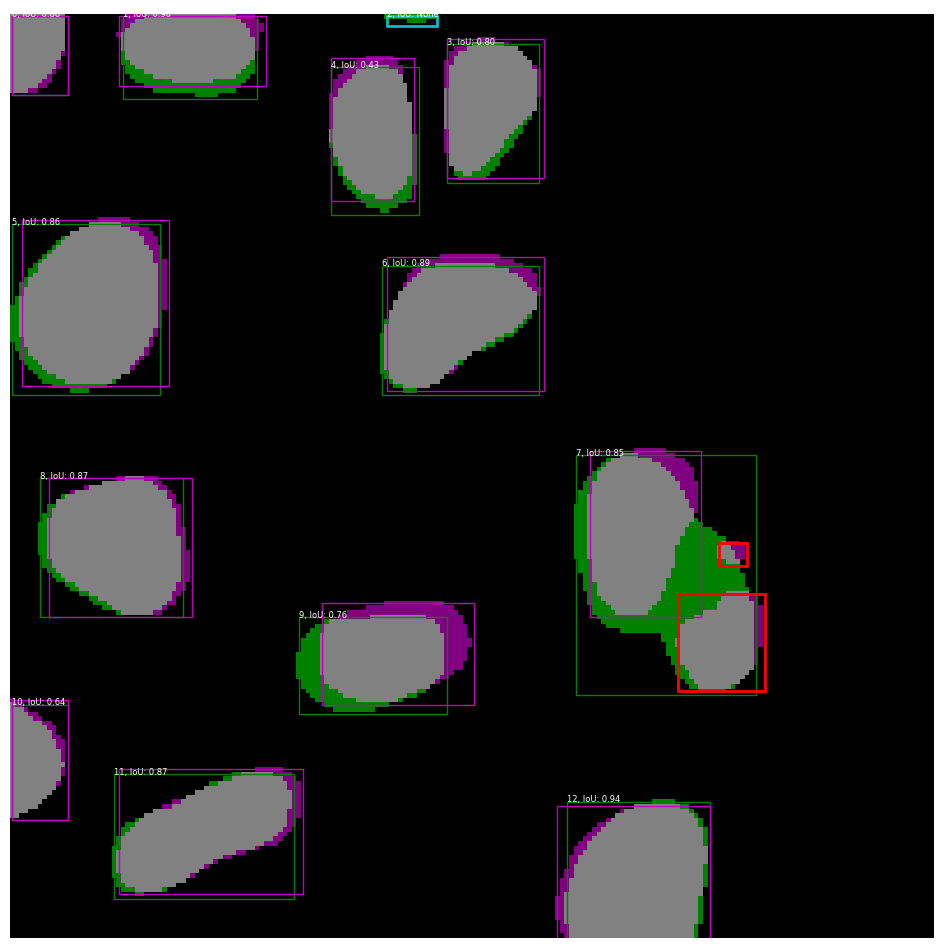

In [4]:
result.plot()

In [5]:
result.n_true_labels

13

### now perform the calculation with strict matching only

In [11]:
result = umetrix.calculate(y_true, y_pred, strict=True, iou_threshold=0.7)
result

,metrics,values
0,N,1
1,strict,True
2,IoU_threshold,0.7
3,n_true_labels,13
4,n_pred_labels,14
5,n_true_positives,10
6,n_false_positives,4
7,n_false_negatives,3
8,IoU,0.861083
9,Jaccard,0.588235


In [7]:
print(result)

 Segmentation Metrics (n=1)
Strict: True (IoU > 0.7)
n_true_labels: 13
n_pred_labels: 14
n_true_positives: 10
n_false_positives: 4
n_false_negatives: 3
IoU: 0.861
Jaccard: 0.588
pixel_identity: 0.959
localization_error: 2.943

